In [163]:
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
import pandas_profiling

In [164]:
path="C:\Users\Anirudh Mathur\Desktop\spend_data.xlsx"
CC_regression=pd.read_excel(path)

In [165]:
CC_regression.shape

(5000, 132)

## Initial Insights of data

In [166]:
pandas_profiling.ProfileReport(CC_regression)

#### Filling out missing values

In [167]:
CC_regression['lncardten'].isnull().sum()

1422

In [168]:
CC_regression['lncardten'].fillna(CC_regression['lncardten'].median(), inplace=True)


In [169]:
CC_regression['townsize'].isnull().sum()

2

In [170]:
CC_regression['townsize'].fillna(CC_regression['townsize'].mode()[0], inplace=True)

In [171]:
CC_regression['townsize'].isnull().sum()

0

In [172]:
CC_regression.isnull().sum()

custid            0
region            0
townsize          0
gender            0
age               0
agecat            0
birthmonth        0
ed                0
edcat             0
jobcat            0
union             0
employ            0
empcat            0
retire            0
income            0
lninc             0
inccat            0
debtinc           0
creddebt          0
lncreddebt        1
othdebt           0
lnothdebt         1
default           0
jobsat            0
marital           0
spoused           0
spousedcat        0
reside            0
pets              0
pets_cats         0
               ... 
cardten           2
lncardten         0
wireless          0
wiremon           0
lnwiremon      3656
wireten           0
lnwireten      3656
multline          0
voice             0
pager             0
internet          0
callid            0
callwait          0
forward           0
confer            0
ebill             0
owntv             0
hourstv           0
ownvcr            0


In [173]:
CC_regression['cardten'].fillna(CC_regression['cardten'].median(), inplace=True)

In [174]:
CC_regression['lncreddebt'].fillna(CC_regression['lncreddebt'].median(), inplace=True)

In [175]:
CC_regression['lnothdebt'].fillna(CC_regression['lnothdebt'].median(), inplace=True)

### Deriving response column 

In [176]:
CC_regression['totalcard_spend']=CC_regression['cardspent']+CC_regression['card2spent']

In [177]:
CC_regression['totalcard_spend'].hist(bins=50)

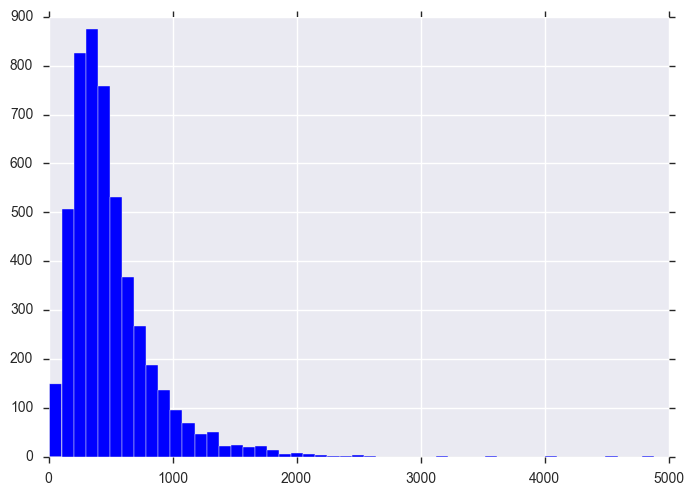

In [178]:
plt.show()

In [179]:
plt.boxplot(CC_regression['totalcard_spend'].values,sym='gD')

{'boxes': [<matplotlib.lines.Line2D at 0x1befbac8>],
 'caps': [<matplotlib.lines.Line2D at 0x1bf0b7f0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1bf17898>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1bf17320>],
 'whiskers': [<matplotlib.lines.Line2D at 0x199c2f60>,
  <matplotlib.lines.Line2D at 0x1bf0b278>]}

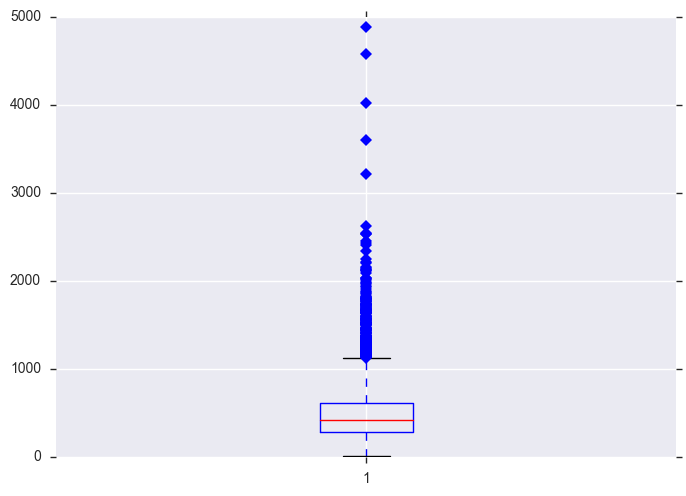

In [180]:
plt.show()

## It shows that we have outliers in response variable. So we need to do some data tranformation on it before building into Model.

In [181]:
plt.scatter(CC_regression['agecat'],CC_regression['totalcard_spend'])


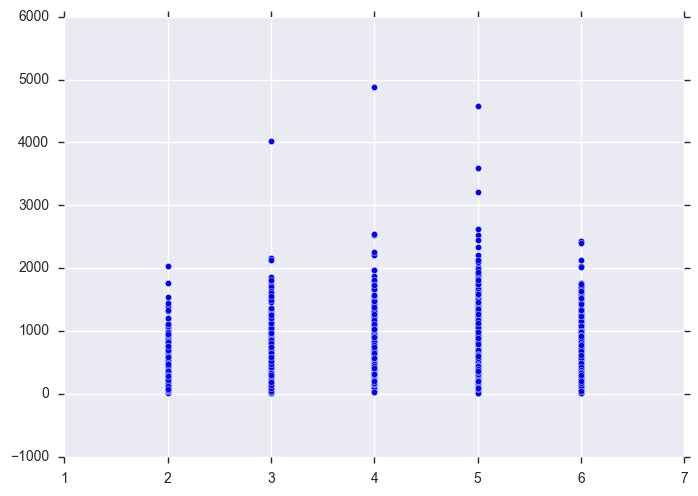

In [182]:
plt.show()

In [185]:
pd.pivot_table(CC_regression,values='totalcard_spend',index=['agecat','inccat']).unstack().plot();

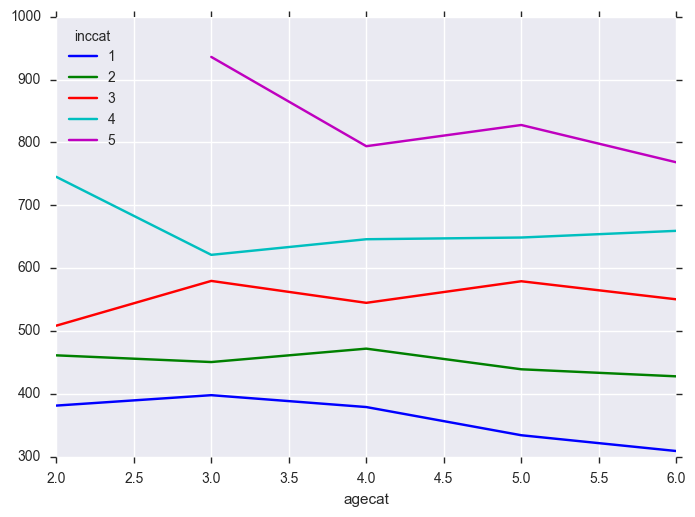

In [186]:
plt.show()

## Above graph shows effect of agecat & inccat on total spend:
- for incat 5 total spend decreases with age.
- Total spend increases with increased income
- Total spend is decreasing for incat 1 & 2 with increasing age


In [187]:
pd.pivot_table(CC_regression,values='totalcard_spend',index=['inccat','jobcat']).unstack().plot();


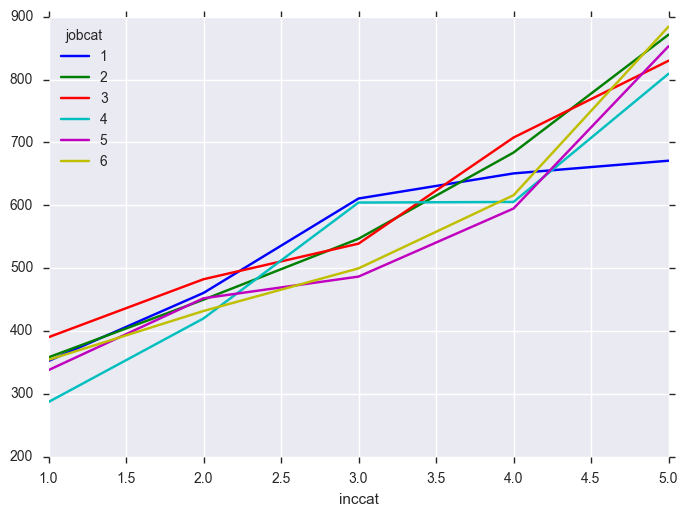

In [188]:
plt.show()

##  Total spend increases with incresead income & job level
- Job level 6, 2 has highest increse in spend .

In [189]:
pd.pivot_table(CC_regression,values='totalcard_spend',index=['addresscat','homeown']).unstack().plot();


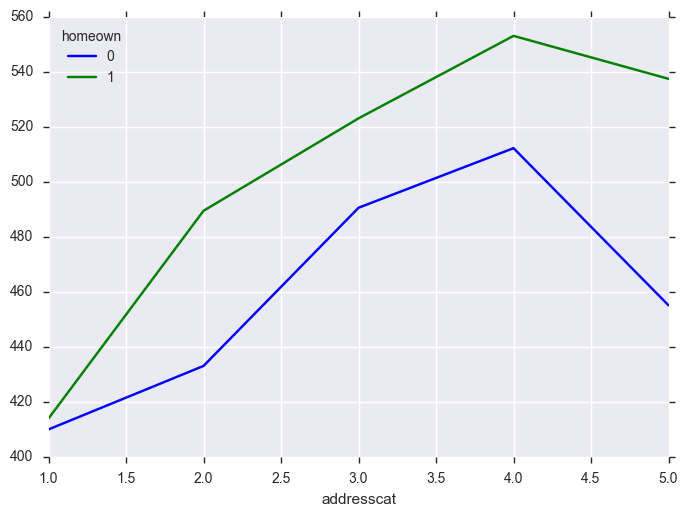

In [190]:
plt.show()

In [191]:
sns.boxplot(x='card',y='totalcard_spend',data=CC_regression)


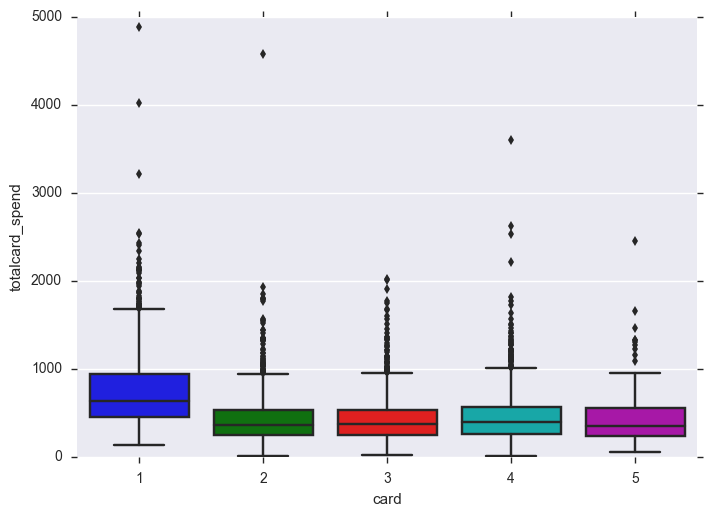

In [192]:
plt.show()

### Card Type 1 has effect on total spend

In [193]:
sns.boxplot(x='region',y='totalcard_spend',data=CC_regression)


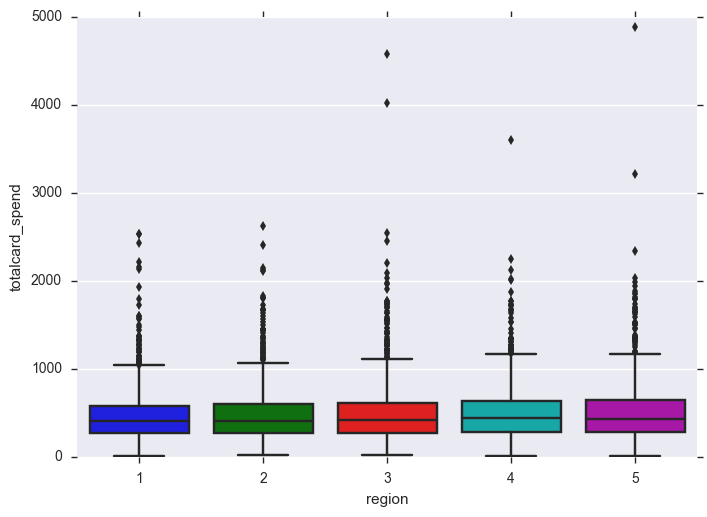

In [194]:
plt.show()

In [195]:
sns.boxplot(x='response_01',y='totalcard_spend',data=CC_regression)


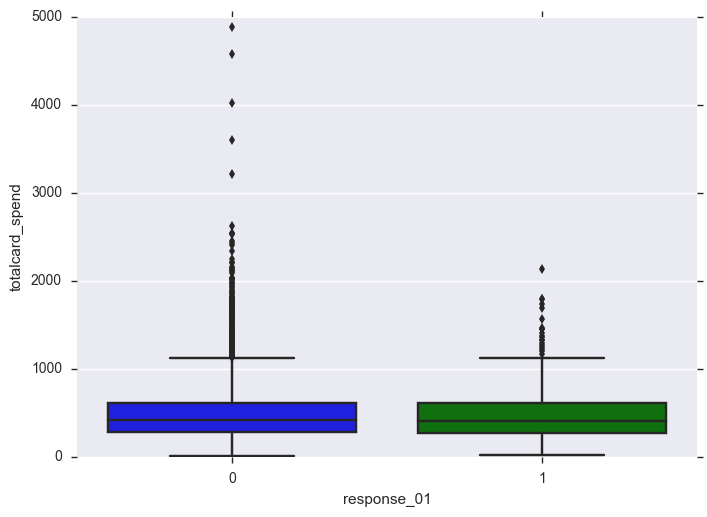

In [196]:
plt.show()

In [197]:
sns.boxplot(x='gender',y='totalcard_spend',data=CC_regression)


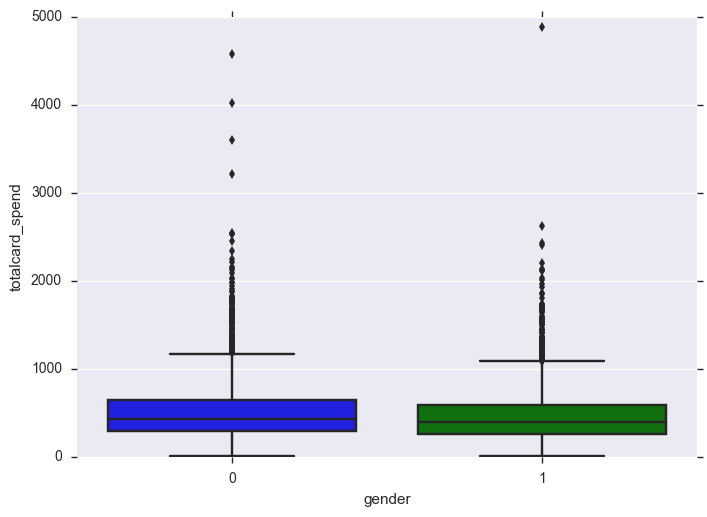

In [198]:
plt.show()

In [199]:
sns.boxplot(x='card2tenurecat',y='totalcard_spend',data=CC_regression)


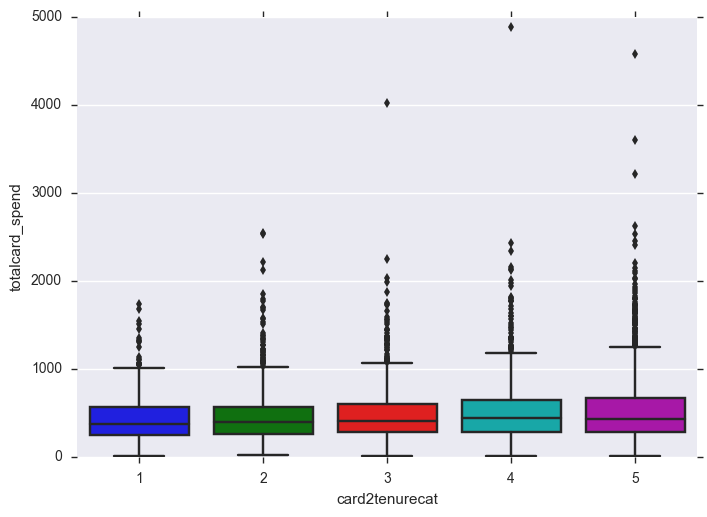

In [200]:
plt.show()

In [201]:
sns.boxplot(x='empcat',y='totalcard_spend',data=CC_regression)


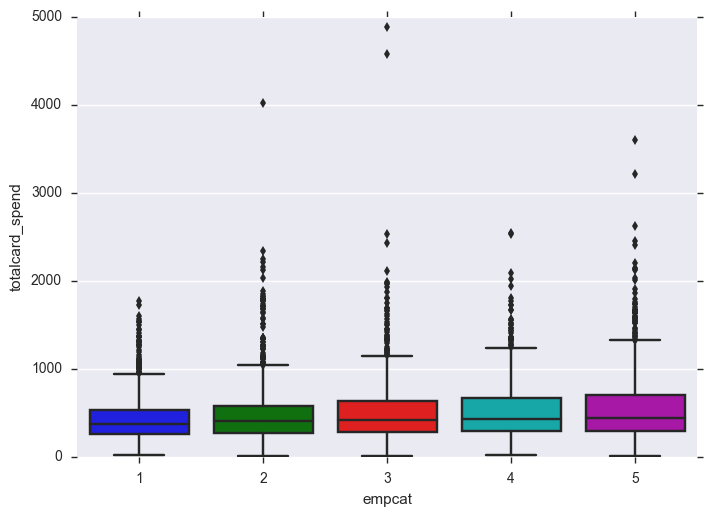

In [202]:
plt.show()

### With increasing work years there is an increase in total card spend

In [203]:
sns.boxplot(x='inccat',y='totalcard_spend',data=CC_regression)


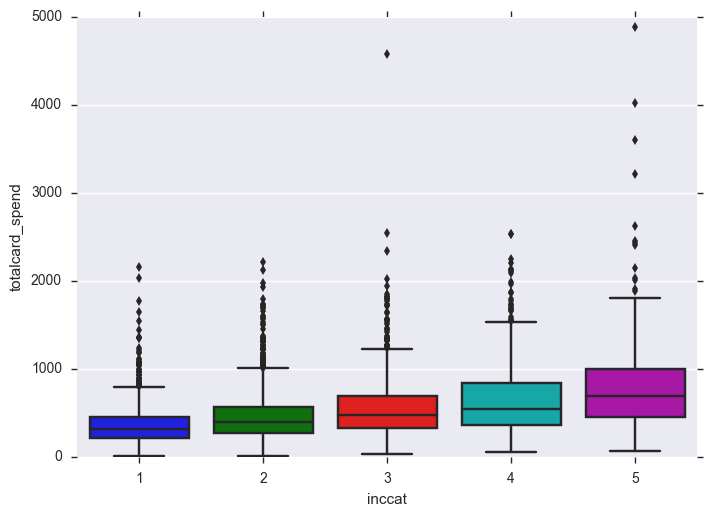

In [204]:
plt.show()

### With increased income there is increase in total spend

In [205]:
sns.boxplot(x='townsize',y='totalcard_spend',data=CC_regression)


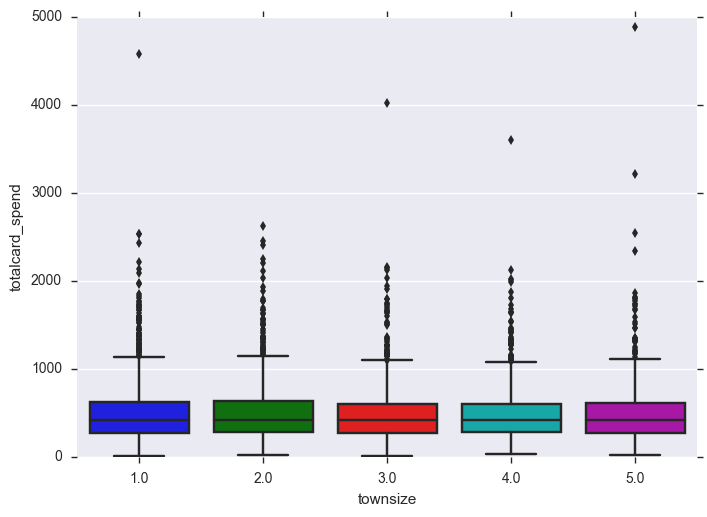

In [206]:
plt.show()

In [207]:
sns.boxplot(x='retire',y='totalcard_spend',data=CC_regression)

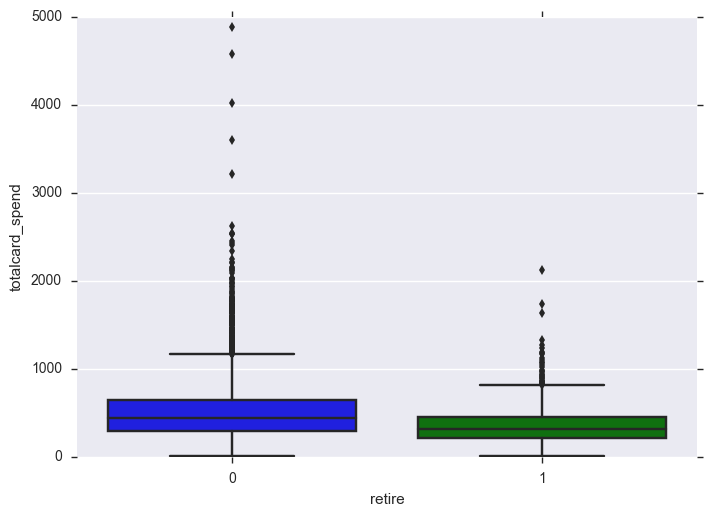

In [208]:
plt.show()

### Retired people are spending less

In [209]:
sns.boxplot(x='spousedcat',y='totalcard_spend',data=CC_regression)

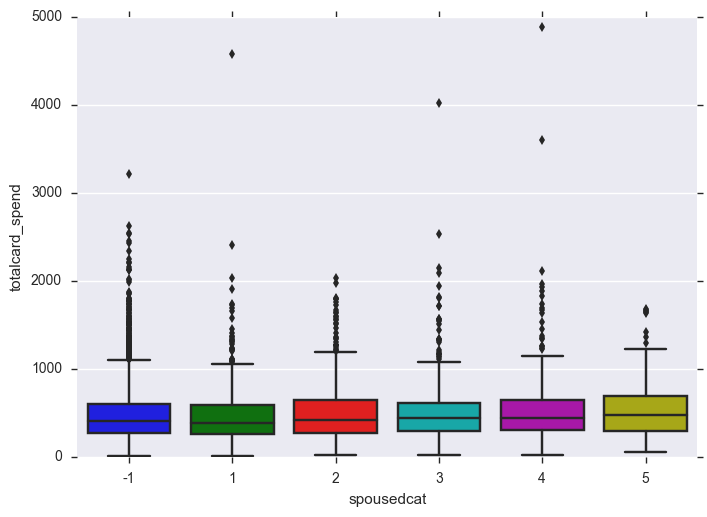

In [210]:
plt.show()

In [211]:
sns.boxplot(x='internet',y='totalcard_spend',data=CC_regression)

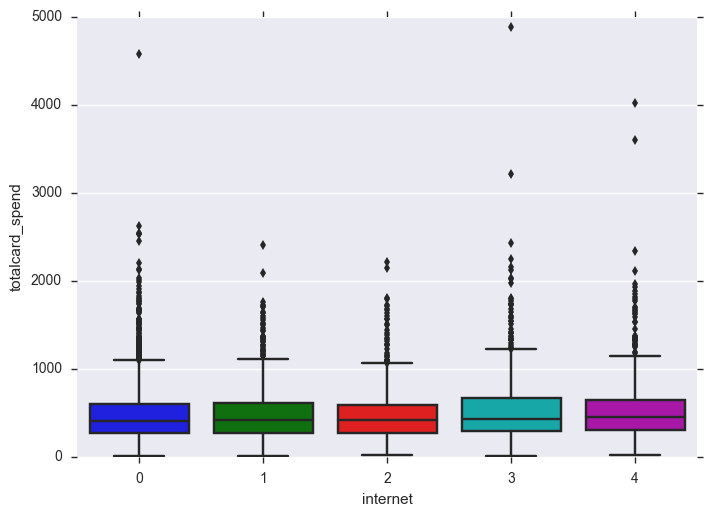

In [212]:
plt.show()

In [213]:
CC_regression.isnull().sum()

custid                0
region                0
townsize              0
gender                0
age                   0
agecat                0
birthmonth            0
ed                    0
edcat                 0
jobcat                0
union                 0
employ                0
empcat                0
retire                0
income                0
lninc                 0
inccat                0
debtinc               0
creddebt              0
lncreddebt            0
othdebt               0
lnothdebt             0
default               0
jobsat                0
marital               0
spoused               0
spousedcat            0
reside                0
pets                  0
pets_cats             0
                   ... 
lncardten             0
wireless              0
wiremon               0
lnwiremon          3656
wireten               0
lnwireten          3656
multline              0
voice                 0
pager                 0
internet              0
callid          

### Dropping columns which are correlated

In [214]:
col_drop_list=['age','employ','address','cardtenure','card2tenure','custid','lncardmon','lnwiremon','lnwireten','longten','lnequipmon','lnequipten',
               'lnlongten','spoused','lntollmon']


col_list_drop=['gender','cardspent','card2spent','lntollmon','lnequipmon','lnequipten','lncardmon','lnwiremon','lnwireten','custid','birthmonth','employ','address','age','ed','carvalue','cartype','commute','commutetime','commutecar','commutemotorcycle',
              'commutecarpool','commutebus','commuterail','commutepublic','commutebike','commutewalk','commutenonmotor','telecommute',
               'cardtenure','card2tenure','bfast','lnothdebt','lnlongmon','lnlongten','lninc','income','lncreddebt','spoused',
               'longten','cardten','townsize','union','default','jobsat',
                  'marital','hometype','cars','carcatvalue','carown','commutecat','reason',
                  'polview','polcontrib','polparty','vote','cardfee','cardtenurecat','card2fee','card2tenurecat','carditems','card2items','active',
                 'churn','tollfree','equip','callcard','wireless','multline','voice','pager','internet','callid','callwait',
                  'forward','confer','ebill','owntv','ownvcr','owndvd','owncd','ownpda','ownpc','ownipod','owngame','ownfax','news','response_01','response_02','response_03','carbuy','carbought','lntollten','hourstv']


#### Distinguishing categorical columns

In [215]:
feat_categorical=['agecat','edcat','jobcat','retire','card','inccat','card2','region','empcat','addresscat','homeown','spousedcat','cardtype','cardbenefit','card2type','card2benefit']

In [216]:
len(feat_categorical)

16

#### Removing outliers from data

In [217]:
Spend_target=np.log(CC_regression['totalcard_spend'])

In [218]:
Spend_df=CC_regression.drop(col_list_drop, axis=1)

In [219]:
Spend_df=Spend_df.drop(['totalcard_spend'], axis=1)

In [220]:
Spend_df.shape

(5000, 38)

In [221]:
feat_numerical=[x for x in Spend_df if x not in feat_categorical]

In [222]:
feat_numerical

[u'debtinc',
 u'creddebt',
 u'othdebt',
 u'reside',
 u'pets',
 u'pets_cats',
 u'pets_dogs',
 u'pets_birds',
 u'pets_reptiles',
 u'pets_small',
 u'pets_saltfish',
 u'pets_freshfish',
 u'tenure',
 u'longmon',
 u'tollmon',
 u'tollten',
 u'equipmon',
 u'equipten',
 u'cardmon',
 u'lncardten',
 u'wiremon',
 u'wireten']

In [223]:
Spend_df[feat_numerical].describe().T

count        mean          std       min        25%  \
debtinc         5000.0    9.954160     6.399783  0.000000   5.100000   
creddebt        5000.0    1.857326     3.415732  0.000000   0.385520   
othdebt         5000.0    3.654460     5.395172  0.000000   0.980301   
reside          5000.0    2.204000     1.393977  1.000000   1.000000   
pets            5000.0    3.067400     3.414497  0.000000   0.000000   
pets_cats       5000.0    0.500400     0.860783  0.000000   0.000000   
pets_dogs       5000.0    0.392400     0.796084  0.000000   0.000000   
pets_birds      5000.0    0.110400     0.494227  0.000000   0.000000   
pets_reptiles   5000.0    0.055600     0.325776  0.000000   0.000000   
pets_small      5000.0    0.114600     0.568798  0.000000   0.000000   
pets_saltfish   5000.0    0.046600     0.469545  0.000000   0.000000   
pets_freshfish  5000.0    1.847400     3.074801  0.000000   0.000000   
tenure          5000.0   38.204800    22.661888  0.000000  18.000000   
longmon         5000.0   13.471450    12.773381  0.900000   5.700000   
tollmon         5000.0   13.264450    16.310018  0.000000   0.000000   
tollten         5000.0  577.832510   949.151586  0.000000   0.000000   
equipmon        5000.0   12.991310    19.212943  0.000000   0.000000   
equipten        5000.0  470.176400   912.220624  0.000000   0.000000   
cardmon         5000.0   15.443850    15.007569  0.000000   0.000000   
lncardten       5000.0    6.487047     0.996106  1.558145   6.224558   
wiremon         5000.0   10.701190    19.799837  0.000000   0.000000   
wireten         5000.0  421.984610  1001.003287  0.000000   0.000000   

                      50%         75%           max  
debtinc          8.800000   13.600000     43.100000  
creddebt         0.926437    2.063820    109.072596  
othdebt          2.098540    4.314780    141.459150  
reside           2.000000    3.000000      9.000000  
pets             2.000000    5.000000     21.000000  
pets_cats        0.000000    1.000000      6.000000  
pets_dogs        0.000000    0.000000      7.000000  
pets_birds       0.000000    0.000000      5.000000  
pets_reptiles    0.000000    0.000000      6.000000  
pets_small       0.000000    0.000000      7.000000  
pets_saltfish    0.000000    0.000000      8.000000  
pets_freshfish   0.000000    4.000000     16.000000  
tenure          38.000000   59.000000     72.000000  
longmon          9.550000   16.550000    179.850000  
tollmon          0.000000   24.500000    173.000000  
tollten          0.000000  885.450000   6923.450000  
equipmon         0.000000   30.800000    106.300000  
equipten         0.000000  510.162500   6525.300000  
cardmon         13.750000   22.750000    188.500000  
lncardten        6.639876    6.984716      9.525516  
wiremon          0.000000   20.962500    186.250000  
wireten          0.000000   89.962500  12858.650000

In [224]:
Spend_df[feat_numerical]=Spend_df[feat_numerical].applymap(lambda x: np.log(x+1))

In [225]:
Spend_df[feat_categorical].columns[Spend_df[feat_categorical].isnull().any()]

Index([], dtype='object')

### Creating Dummies for categorical

In [226]:
dummy_columns=[x for x in feat_categorical if x not in ['retire','homeown']]

In [227]:
dummy_columns

['agecat',
 'edcat',
 'jobcat',
 'card',
 'inccat',
 'card2',
 'region',
 'empcat',
 'addresscat',
 'spousedcat',
 'cardtype',
 'cardbenefit',
 'card2type',
 'card2benefit']

In [228]:
data=Spend_df[dummy_columns].astype('object')
data.shape

(5000, 14)

In [229]:
data_dummy=pd.get_dummies(data)

In [230]:
x=pd.concat([data_dummy,Spend_df[['retire','homeown']],Spend_df[feat_numerical]],axis=1)

In [231]:
x.head()

agecat_2  agecat_3  agecat_4  agecat_5  agecat_6  edcat_1  edcat_2  \
0         1         0         0         0         0        0        0   
1         1         0         0         0         0        0        0   
2         0         0         0         0         1        0        1   
3         1         0         0         0         0        0        0   
4         0         1         0         0         0        0        0   

   edcat_3  edcat_4  edcat_5    ...       tenure   longmon   tollmon  \
0        1        0        0    ...     1.791759  2.014903  3.401197   
1        0        1        0    ...     3.688879  2.292535  0.000000   
2        0        0        0    ...     4.189655  3.380995  0.000000   
3        1        0        0    ...     3.610918  1.945910  0.000000   
4        1        0        0    ...     3.091042  1.398717  2.862201   

    tollten  equipmon  equipten   cardmon  lncardten   wiremon   wireten  
0  5.087905  3.417727  4.844974  2.724580   1.628131  0.000000  0.000000  
1  0.000000  4.022670  7.588830  2.833213   2.003297  3.842673  7.429254  
2  0.000000  0.000000  0.000000  3.178054   2.110376  0.000000  0.000000  
3  0.000000  0.000000  0.000000  3.091042   2.018818  0.000000  0.000000  
4  5.962808  0.000000  0.000000  2.904165   1.929505  2.998229  6.020538  

[5 rows x 92 columns]

## Model Building

In [232]:
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder,StandardScaler

In [233]:
from sklearn.feature_selection import SelectKBest,f_regression,f_classif

In [234]:
sc=StandardScaler()

In [235]:
x_scaled=sc.fit_transform(x.values)

In [236]:
#X=x_scaled
#y=Spend_target.values

In [237]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=112345)

In [238]:
extr=ExtraTreesRegressor(n_estimators=50,max_depth=10)

In [239]:
extr.fit(x_scaled,Spend_target.values)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=10,
          max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
          min_samples_split=2, min_weight_fraction_leaf=0.0,
          n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
          verbose=0, warm_start=False)

In [240]:
extr.feature_importances_

array([ 0.00157479,  0.00243119,  0.00542374,  0.00655001,  0.00268529,
        0.00248332,  0.00297474,  0.00697362,  0.00609386,  0.00456272,
        0.0064331 ,  0.00561488,  0.00823363,  0.00612785,  0.00497045,
        0.00344078,  0.22040077,  0.01073023,  0.00103923,  0.01096058,
        0.00293669,  0.1386149 ,  0.0617718 ,  0.00165389,  0.00241721,
        0.02181795,  0.08843256,  0.0013475 ,  0.00361111,  0.00270913,
        0.0045408 ,  0.01275105,  0.00330412,  0.00886553,  0.00274449,
        0.00907688,  0.00209154,  0.00302515,  0.00561079,  0.0042975 ,
        0.00136241,  0.00084434,  0.00202932,  0.00311985,  0.00458642,
        0.00481725,  0.00600791,  0.0048629 ,  0.00777156,  0.00431357,
        0.00300692,  0.00170476,  0.00863496,  0.00630572,  0.00381875,
        0.00708208,  0.01158062,  0.00371851,  0.00441849,  0.00344552,
        0.00406646,  0.01010167,  0.00947053,  0.0054168 ,  0.00363215,
        0.00534593,  0.00432823,  0.00549357,  0.01604599,  0.00

In [241]:
ext_feature=pd.DataFrame(extr.feature_importances_,index=x.columns,columns=['important'])

In [242]:
ext_feat_sort=ext_feature.sort_values(by='important',ascending=False)

In [243]:
ext_feature.sort_values(by='important',ascending=False).plot.bar(figsize=(25,10))

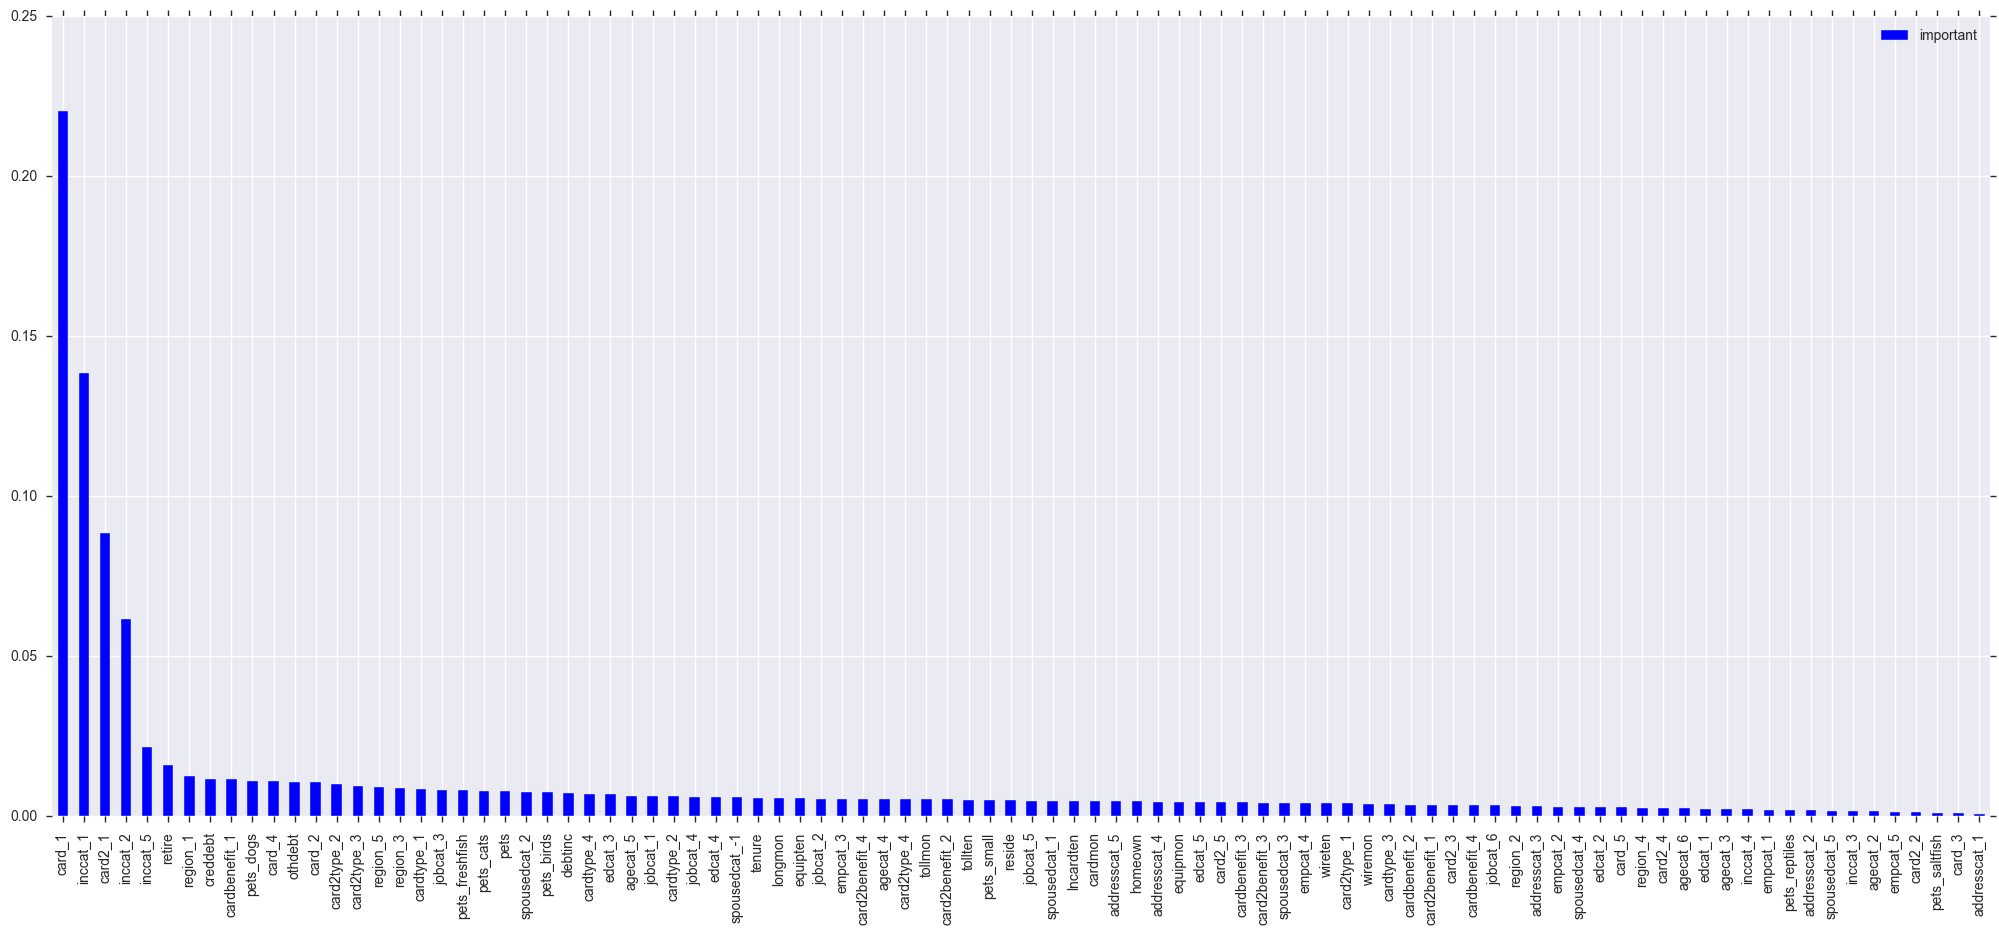

In [244]:
plt.show()

In [245]:
ext_feat_sort[:25]

important
card_1           0.220401
inccat_1         0.138615
card2_1          0.088433
inccat_2         0.061772
inccat_5         0.021818
retire           0.016046
region_1         0.012751
creddebt         0.011659
cardbenefit_1    0.011581
pets_dogs        0.011241
card_4           0.010961
othdebt          0.010821
card_2           0.010730
card2type_2      0.010102
card2type_3      0.009471
region_5         0.009077
region_3         0.008866
cardtype_1       0.008635
jobcat_3         0.008234
pets_freshfish   0.008153
pets_cats        0.007986
pets             0.007926
spousedcat_2     0.007772
pets_birds       0.007715
debtinc          0.007334

In [246]:
ext_feat_sort[25:]

important
cardtype_4       0.007082
edcat_3          0.006974
agecat_5         0.006550
jobcat_1         0.006433
cardtype_2       0.006306
jobcat_4         0.006128
edcat_4          0.006094
spousedcat_-1    0.006008
tenure           0.005812
longmon          0.005784
equipten         0.005755
jobcat_2         0.005615
empcat_3         0.005611
card2benefit_4   0.005494
agecat_4         0.005424
card2type_4      0.005417
tollmon          0.005394
card2benefit_2   0.005346
tollten          0.005274
pets_small       0.005196
reside           0.004997
jobcat_5         0.004970
spousedcat_1     0.004863
lncardten        0.004859
cardmon          0.004846
addresscat_5     0.004817
homeown          0.004699
addresscat_4     0.004586
equipmon         0.004572
edcat_5          0.004563
...                   ...
wiremon          0.004020
cardtype_3       0.003819
cardbenefit_2    0.003719
card2benefit_1   0.003632
card2_3          0.003611
cardbenefit_4    0.003446
jobcat_6         0.003441
region_2         0.003304
addresscat_3     0.003120
empcat_2         0.003025
spousedcat_4     0.003007
edcat_2          0.002975
card_5           0.002937
region_4         0.002744
card2_4          0.002709
agecat_6         0.002685
edcat_1          0.002483
agecat_3         0.002431
inccat_4         0.002417
empcat_1         0.002092
pets_reptiles    0.002042
addresscat_2     0.002029
spousedcat_5     0.001705
inccat_3         0.001654
agecat_2         0.001575
empcat_5         0.001362
card2_2          0.001348
pets_saltfish    0.001071
card_3           0.001039
addresscat_1     0.000844

[67 rows x 1 columns]

In [247]:
final_pred=ext_feat_sort[:25].index.tolist()
final_pred

[u'card_1',
 u'inccat_1',
 u'card2_1',
 u'inccat_2',
 u'inccat_5',
 u'retire',
 u'region_1',
 u'creddebt',
 u'cardbenefit_1',
 u'pets_dogs',
 u'card_4',
 u'othdebt',
 u'card_2',
 u'card2type_2',
 u'card2type_3',
 u'region_5',
 u'region_3',
 u'cardtype_1',
 u'jobcat_3',
 u'pets_freshfish',
 u'pets_cats',
 u'pets',
 u'spousedcat_2',
 u'pets_birds',
 u'debtinc']

In [248]:
X_train, X_test, y_train, y_test = train_test_split(x[final_pred].values,Spend_target.values, train_size=0.7, random_state=112345)

In [249]:
from sklearn.cross_validation import cross_val_score

In [250]:
sc=StandardScaler()
Xl_train_scale=sc.fit_transform(X_train)
Xl_test_scale=sc.fit_transform(X_test)

In [251]:
lm_1=LinearRegression()

In [252]:
lm_1.fit(Xl_train_scale,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [253]:
lm_1.predict(Xl_test_scale)[:5]

array([ 5.6843506 ,  6.29119162,  6.19079548,  6.16324046,  7.11015775])

In [254]:
mse=cross_val_score(lm_1,X=Xl_train_scale,y=y_train,cv=5,scoring='mean_squared_error')
mse

array([-0.29157833, -0.28498028, -0.28366695, -0.32998864, -0.33880688])

In [255]:
rmse_lin_train=np.sqrt(-np.mean(mse))

In [256]:
rmse_lin_train

0.55299567613930301

In [257]:
rmse_lin_test=np.sqrt(-np.mean(cross_val_score(lm_1,X=Xl_test_scale,y=y_test,cv=5,scoring='mean_squared_error')))

In [258]:
rmse_lin_test

0.58098948690623409

In [259]:
print "Rmse_train- Linear Model" ,rmse_lin_train,'\n'
print "Rmse_test- Linear Model" ,rmse_lin_test,'\n'

Rmse_train- Linear Model 0.552995676139 

Rmse_test- Linear Model 0.580989486906 



In [260]:
pd.Series(y_test-lm_1.predict(Xl_test_scale)).plot.hist(bins=40)

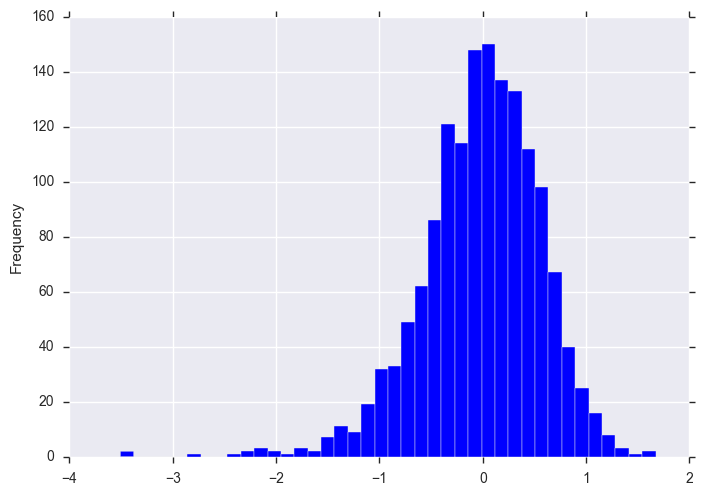

In [261]:
plt.show()

### Satisfying linear model assumptions

In [262]:
pd.Series(y_test-lm_1.predict(Xl_test_scale)).mean(), pd.Series(y_test-lm_1.predict(Xl_test_scale)).std()

(-0.01518518548037257, 0.5775429293577728)

In [263]:
from scipy.stats import kstest

In [264]:
sc_res=sc.fit_transform(pd.Series(y_test-lm_1.predict(Xl_test_scale)))
pd.Series(sc_res).mean(),pd.Series(sc_res).std()

C:\Users\Anirudh Mathur\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:583: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\Anirudh Mathur\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:646: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


(-4.366877230192282e-18, 1.0003335000926465)

In [265]:
kstest(sc_res,'norm')

KstestResult(statistic=0.04420569301683458, pvalue=0.0055140925805421404)

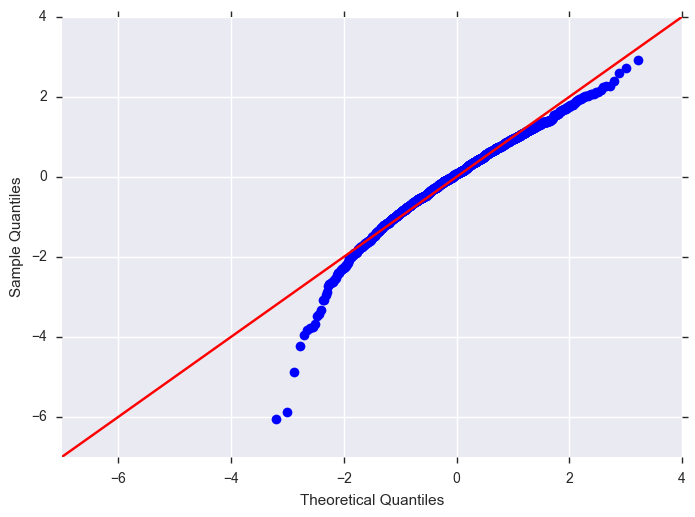

In [266]:
import statsmodels.api as sm
sm.qqplot(sc_res,line='45')

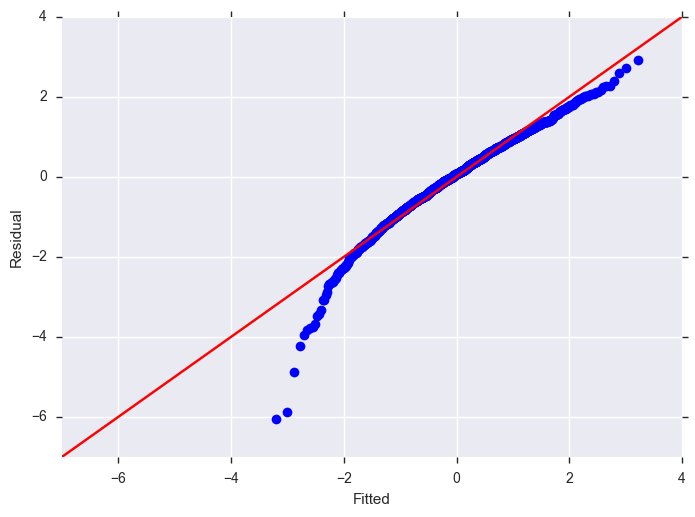

In [267]:
plt.scatter(lm_1.predict(Xl_test_scale),y_test-lm_1.predict(Xl_test_scale),marker='*')
plt.xlabel("Fitted")
plt.ylabel("Residual")
plt.show()

## . Residual Vs fitted plot gives a very good insight.
  - Since there is no pattens in the error terms , so there is no non-linearity in data
  - it has constant variance , homoskedacity

## 2. Random Forest

In [268]:
from sklearn.ensemble import RandomForestRegressor

In [269]:
from sklearn.grid_search import GridSearchCV

In [270]:
rm_1=RandomForestRegressor(random_state=12)

In [271]:
param_grid = { "n_estimators"      : [100,150,200],
               "max_features"      : [5, 10],
           "max_depth"         : [10, 20],
           "min_samples_split" : [2, 4]
           }
grs=GridSearchCV(estimator=rm_1,param_grid=param_grid,cv=5,verbose=True)


In [272]:
grs.fit(Xl_train_scale,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:   23.5s
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  1.3min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=12,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100, 150, 200], 'max_features': [5, 10], 'min_samples_split': [2, 4], 'max_depth': [10, 20]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=True)

In [273]:
grs_mse_train=cross_val_score(grs.best_estimator_,X=Xl_train_scale,y=y_train,cv=5,scoring='mean_squared_error')
grs_mse_test=cross_val_score(grs.best_estimator_,X=Xl_test_scale,y=y_test,cv=5,scoring='mean_squared_error')


In [274]:
grs_rmse_tr=np.sqrt(-np.mean(grs_mse_train))
grs_rmse_test=np.sqrt(-np.mean(grs_mse_test))

In [275]:
print "Rmse_train- random" ,grs_rmse_tr,'\n'
print "Rmse_test- random" ,grs_rmse_test,'\n'

Rmse_train- random 0.560351685327 

Rmse_test- random 0.592420105162 



# Two models have comparative RMSE values.



## Random Forest:
-Rmse_train- random 0.56188752795 

-Rmse_test- random 0.590278751078  

## Linear Model:

Rmse_train- Linear Model 0.555952510856 

Rmse_test- Linear Model 0.583305822635  

***

## Drivers for the Model:

[u'card_1',u'inccat_1',u'card2_1',u'inccat_2',u'inccat_5',u'retire',u'region_1',u'cardbenefit_1',u'pets_dogs',u'othdebt', u'creddebt',u'card_4',u'card2type_2',u'card_2',u'card2type_3',u'region_5',u'spousedcat_2',u'jobcat_3',u'region_3',u'pets_cats',
u'cardtype_1',u'pets',u'agecat_5',u'pets_birds',u'cardtype_4']

---

